In [1]:
import warnings
warnings.filterwarnings('ignore')

# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [2]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/21f_made/homeworks/Lab1_ML_pipeline_and_SVM/car_data.csv

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [4]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,750,96,40,78,170,58,7,174,38,21,139,197,455,160,68,3,29,191,200
1,195,86,43,66,130,56,7,152,44,19,142,177,340,173,81,6,14,181,185
2,663,89,47,83,169,61,8,164,40,20,150,189,402,190,72,7,10,187,193
3,527,109,49,103,186,57,11,206,32,23,156,212,630,186,65,12,21,192,201
4,388,94,47,85,333,138,49,155,43,19,155,320,354,187,135,12,9,188,196
5,688,89,35,52,121,57,4,122,55,17,125,139,220,128,82,5,13,181,184
6,22,94,43,64,173,69,7,150,43,19,142,169,344,177,68,9,1,199,206
7,411,78,36,51,116,56,4,120,57,17,124,135,209,135,84,1,12,177,184
8,116,100,45,100,209,65,8,201,32,23,147,231,611,189,72,5,5,189,195
9,752,100,36,73,199,73,6,162,40,20,127,189,401,125,72,6,19,200,204


Methods `describe` and `info` deliver some useful information.

In [5]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,428.484517,93.551913,44.648452,81.506375,168.020036,61.540984,8.508197,168.160291,41.116576,20.539162,147.479053,188.043716,436.663024,173.653916,72.593807,6.242259,12.695811,188.921676,195.564663
std,251.235905,8.402703,6.140263,15.747044,32.938861,7.614135,4.690263,33.391667,7.870593,2.599975,14.484387,31.720522,177.434138,32.647594,7.675254,4.808520,8.941436,6.250202,7.506804
min,0.000000,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,207.000000,87.000000,40.000000,70.000000,141.000000,57.000000,6.000000,146.000000,33.000000,19.000000,136.000000,167.000000,314.000000,148.000000,67.000000,2.000000,5.000000,184.000000,190.000000
50%,432.000000,92.000000,44.000000,78.000000,166.000000,61.000000,8.000000,157.000000,43.000000,20.000000,145.000000,178.000000,363.000000,172.000000,72.000000,5.000000,11.000000,188.000000,197.000000
75%,648.000000,100.000000,50.000000,96.000000,194.000000,65.000000,10.000000,197.000000,46.000000,23.000000,159.000000,216.000000,586.000000,197.000000,76.000000,9.000000,19.000000,193.000000,201.000000
max,845.000000,119.000000,58.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,180.000000,320.000000,1018.000000,262.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [6]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [7]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler


def preprocess(X_train, X_test):
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled


X_train_preprocessed, X_test_preprocessed = preprocess(X_train, X_test)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, accuracy_score, classification_report
from scikitplot.metrics import plot_roc

param_grid = {"penalty": ["l1", "l2"], "C": np.logspace(-1, 4, 6)}

logreg = LogisticRegression(multi_class="multinomial", solver="saga", tol=1e-3, max_iter=500)
logreg_cv = GridSearchCV(logreg, param_grid=param_grid)

logreg_cv.fit(X_train_preprocessed, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=500,
                                          multi_class='multinomial',
                                          solver='saga', tol=0.001),
             param_grid={'C': array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04]),
                         'penalty': ['l1', 'l2']})

LogisticRegression(C=100.0, max_iter=500, multi_class='multinomial',
                   penalty='l1', solver='saga', tol=0.001)
              precision    recall  f1-score   support

         bus       0.92      0.93      0.92        71
        opel       0.69      0.65      0.67        83
        saab       0.65      0.66      0.65        73
         van       0.95      0.99      0.97        70

    accuracy                           0.80       297
   macro avg       0.80      0.81      0.80       297
weighted avg       0.79      0.80      0.80       297



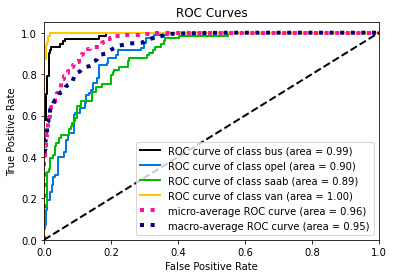

In [9]:
def get_crossval_result(clf_cv, X_test, y_test):
    print(clf_cv.best_estimator_)

    y_pred = clf_cv.predict(X_test)
    print(classification_report(y_test, y_pred))

    y_proba = clf_cv.predict_proba(X_test)
    plot_roc(y_test, y_proba)


get_crossval_result(logreg_cv, X_test_preprocessed, y_test)

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

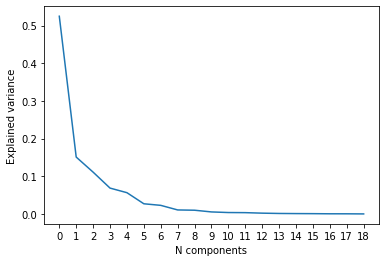

In [18]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

n_components = X_train_preprocessed.shape[1]
pca = PCA(n_components=n_components)
pca.fit(X_train_preprocessed)

plt.plot(range(n_components), pca.explained_variance_ratio_)
plt.ylabel('Explained variance')
plt.xlabel('N components')
plt.xticks(range(n_components))
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [19]:
# 7 Первых главных компонент объясняют более 95% дисперсии
np.cumsum(pca.explained_variance_ratio_)

array([0.52497255, 0.67595845, 0.78692338, 0.85553032, 0.91193867,
       0.9388922 , 0.96165676, 0.97222635, 0.98205587, 0.98734479,
       0.99103402, 0.99442359, 0.99645193, 0.9976807 , 0.99859229,
       0.99930758, 0.99966323, 0.99997825, 1.        ])

In [20]:
# Перед применением PCA необходима нормализация данных
# https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html
pca = PCA(n_components=7)
X_train_pca = pca.fit_transform(X_train_preprocessed)
X_test_pca = pca.transform(X_test_preprocessed)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [21]:
from sklearn.pipeline import Pipeline

param_grid = {"penalty": ["l1", "l2"], "C": np.logspace(-1, 4, 6)}

logreg_pca_cv = GridSearchCV(
    LogisticRegression(multi_class="multinomial", solver="saga", tol=1e-3, max_iter=500),
    param_grid=param_grid
)
logreg_pca_cv.fit(X_train_pca, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=500,
                                          multi_class='multinomial',
                                          solver='saga', tol=0.001),
             param_grid={'C': array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04]),
                         'penalty': ['l1', 'l2']})

LogisticRegression(C=10.0, max_iter=500, multi_class='multinomial',
                   solver='saga', tol=0.001)
              precision    recall  f1-score   support

         bus       0.48      0.69      0.56        71
        opel       0.45      0.16      0.23        83
        saab       0.43      0.49      0.46        73
         van       0.74      0.87      0.80        70

    accuracy                           0.54       297
   macro avg       0.53      0.55      0.51       297
weighted avg       0.52      0.54      0.50       297



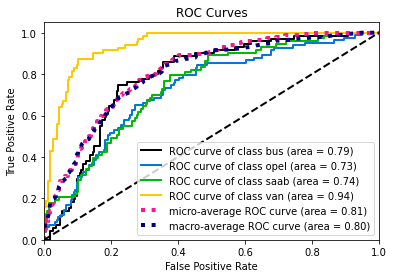

In [22]:
# Качество модели упало
get_crossval_result(logreg_pca_cv, X_test_pca, y_test)

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [23]:
from sklearn.tree import DecisionTreeClassifier


param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": np.arange(2, 20, 2),
    "min_samples_split": np.arange(2, 10, 2),
    "min_samples_leaf": np.arange(2, 10, 2)
}

tree_cv = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid)
tree_cv.fit(X_train_preprocessed, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                         'min_samples_leaf': array([2, 4, 6, 8]),
                         'min_samples_split': array([2, 4, 6, 8])})

DecisionTreeClassifier(max_depth=12, min_samples_leaf=4, min_samples_split=4)
              precision    recall  f1-score   support

         bus       0.91      0.90      0.91        71
        opel       0.50      0.49      0.50        83
        saab       0.44      0.45      0.45        73
         van       0.89      0.89      0.89        70

    accuracy                           0.67       297
   macro avg       0.68      0.68      0.68       297
weighted avg       0.68      0.67      0.67       297



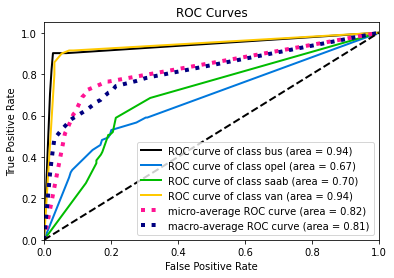

In [25]:
get_crossval_result(tree_cv, X_test_preprocessed, y_test)

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [26]:
from sklearn.ensemble import BaggingClassifier


def plot_bagging_scores(bagging_classifier, X_test, y_test):    
    predictions = []
    classes = bagging_classifier.classes_

    for estimator in bagging_classifier.estimators_:
        predictions.append(estimator.predict_proba(X_test)[None, :])

    predictions = np.vstack(predictions)
    predictions = np.cumsum(predictions, axis=0) / np.arange(1, predictions.shape[0] + 1)[:, None, None]
    
    history = {"f1_score": [], "accuracy": []}
    for prediction in predictions:
        argmax_probas = np.argmax(prediction, axis=1)
        argmax_labels = classes[argmax_probas]
        history["f1_score"].append(f1_score(y_test, argmax_labels, average='macro'))
        history["accuracy"].append(accuracy_score(y_test, argmax_labels))

    plt.figure(figsize=(10, 6))
    plt.plot(history["f1_score"])
    plt.plot(history["accuracy"])
    plt.xlabel('num_trees')
    plt.xticks(range(0, bagging_classifier.n_estimators, 5))
    plt.ylabel('f1_macro')

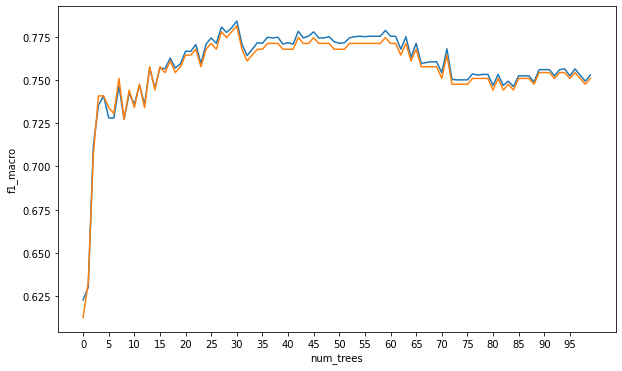

In [27]:
# 1. Решающее дерево с дефолтными параметрами и глубиной 50
# Для хорошей точности достаточно взять 30 базовых моделей
tree_bagging_classifier = BaggingClassifier(DecisionTreeClassifier(max_depth=50), n_estimators=100)
tree_bagging_classifier.fit(X_train_preprocessed, y_train)
plot_bagging_scores(tree_bagging_classifier, X_test_preprocessed, y_test)

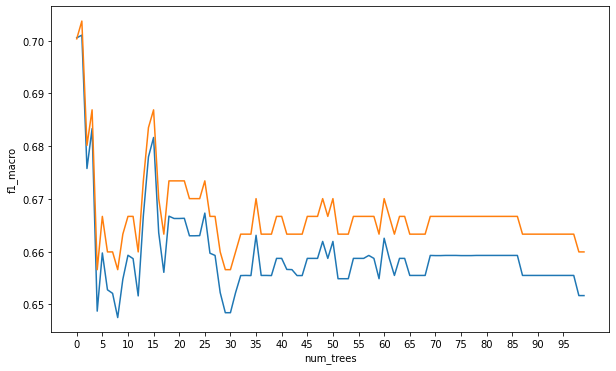

In [28]:
# 2. Логистическая регрессия с дефолтными параметрами
# Для хорошей точности достаточно взять 2 базовые модели
logreg_bagging_classifier = BaggingClassifier(
    LogisticRegression(multi_class="multinomial", solver="saga", tol=1e-3, max_iter=500), n_estimators=100
)
logreg_bagging_classifier.fit(X_train_preprocessed, y_train)
plot_bagging_scores(logreg_bagging_classifier, X_test_preprocessed, y_test)

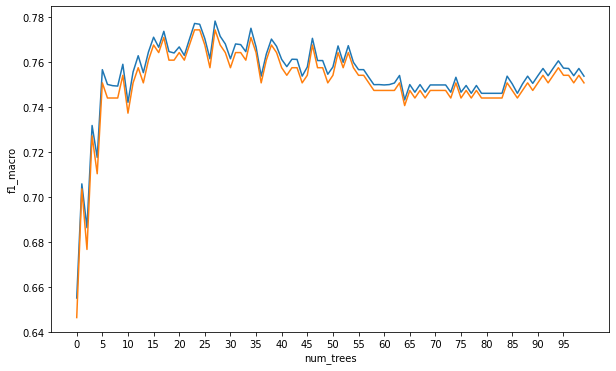

In [31]:
# 3. Решающее дерево с найденными ранее оптимальными параметрами
# Для хорошей точности достаточно взять 25 базовых моделей
tree_best_bagging_classifier = BaggingClassifier(tree_cv.best_estimator_, n_estimators=100)
tree_best_bagging_classifier.fit(X_train_preprocessed, y_train)
plot_bagging_scores(tree_best_bagging_classifier, X_test_preprocessed, y_test)

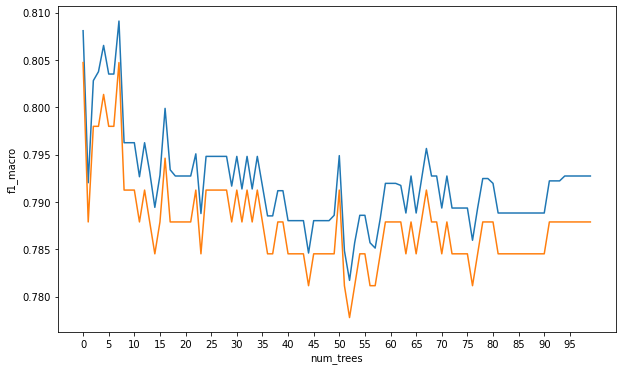

In [32]:
# 4. Логистическая регрессия с найденными ранее оптимальными параметрами показала лучший результат
# Для хорошей точности достаточно взять 8 базовых моделей
logreg_best_bagging_classifier = BaggingClassifier(logreg_cv.best_estimator_, n_estimators=100)
logreg_best_bagging_classifier.fit(X_train_preprocessed, y_train)
plot_bagging_scores(logreg_best_bagging_classifier, X_test_preprocessed, y_test)

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

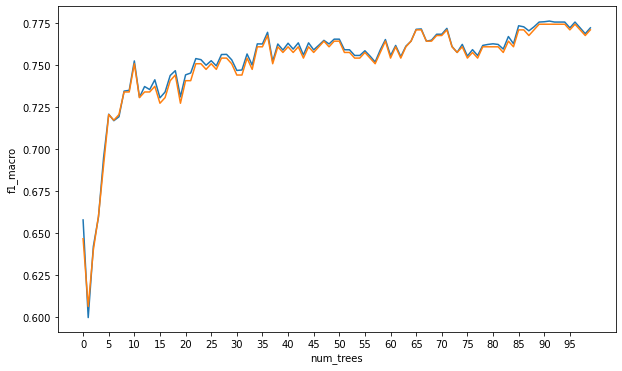

In [37]:
from sklearn.ensemble import RandomForestClassifier

# Для хорошей точности достаточно взять 35 базовых моделей, дальше точность растет не сильно
# Результаты немного отличаются от полученных в пункте 2.6
# Это можно объяснить различным разбиением на случайне подпростарнства признаков
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train_preprocessed, y_train)
plot_bagging_scores(rf_clf, X_test_preprocessed, y_test)

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [38]:
def evaluate_model_on_subsets(clf, X_train, y_train, X_test, y_test):
    history = {"f1_score": [], "accuracy": []}
    
    n_samples = X_train.shape[0]
    num_subsamples_range = np.linspace(n_samples // 10, n_samples, 10)
    
    for i in num_subsamples_range:
        clf.fit(X_train[:int(i)], y_train[:int(i)])
        y_pred = clf.predict(X_test)
        
        history["accuracy"].append(accuracy_score(y_test, y_pred))
        history["f1_score"].append(f1_score(y_test, y_pred, average="macro"))

    plt.figure(figsize=(10, 6))
    plt.plot(num_subsamples_range, history["f1_score"])
    plt.plot(num_subsamples_range, history["accuracy"])
    plt.xlabel('num samples')
    plt.xticks(num_subsamples_range)
    plt.ylabel('f1_macro')

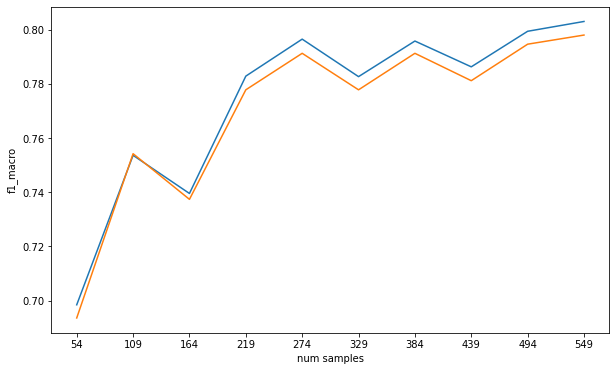

In [39]:
# 1. Логистическая регрессия с найденными ранее оптимальными параметрами
# Уже на половине примеров качество модели почти достигает 0.8
# Качество модели возрастает с увеличением количества примеров в обучающей выборке
evaluate_model_on_subsets(logreg_cv.best_estimator_, X_train_preprocessed, y_train, X_test_preprocessed, y_test)

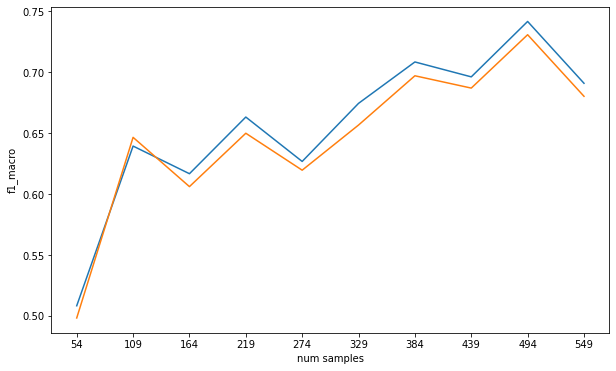

In [40]:
# 2. Решающее дерево с найденными ранее оптимальными параметрами
# Качество модели возрастает с увеличением количества примеров в обучающей выборке
evaluate_model_on_subsets(tree_cv.best_estimator_, X_train_preprocessed, y_train, X_test_preprocessed, y_test)

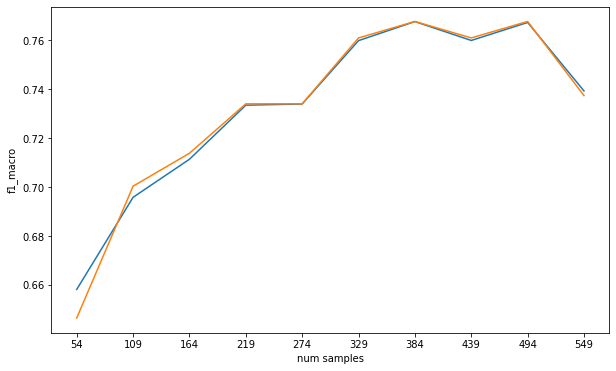

In [41]:
# 3. Случайный лес
# Качество модели возрастает с увеличением количества примеров в обучающей выборке
evaluate_model_on_subsets(RandomForestClassifier(), X_train_preprocessed, y_train, X_test_preprocessed, y_test)

Качество моделей, полученных на подвыборках, не возрастает монотонно, а иногда падает
Это может быть связано с неравномерным распределением классов по подвыборкам